In [3]:
import tensorflow as tf #opencd

In [4]:
mnist = tf.keras.datasets.mnist ##dataset of handwritten characters based on 28x28 images of numbers 0-9

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [9]:
x_train.shape

(60000, 28, 28)

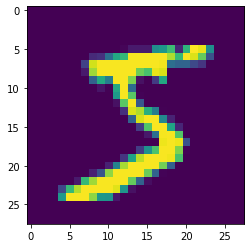

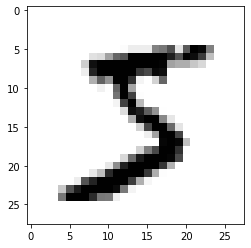

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)
##checking the graph to see how the data looks like

In [12]:
print (x_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

###images are in gray level (1 channel -> 0-255), not RGB


#normalizing the data | pre-processing step

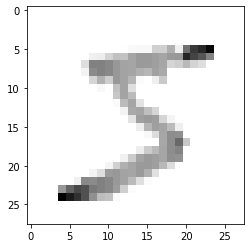

In [14]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

After Normalization

In [16]:
print (x_train[0]) ## normalized values

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [17]:
print (y_train[0])

5


Resizing image to apply convolution operation.

In [60]:
import numpy as np
size = 28
x_trainr = np.array(x_train).reshape(-1, size, size, 1)
x_testr = np.array(x_test).reshape(-1, size, size, 1)
print ("Training sample dimensions:", x_trainr.shape)
print ("Testing sample dimensions:", x_testr.shape)

Training sample dimensions: (60000, 28, 28, 1)
Testing sample dimensions: (10000, 28, 28, 1)


Creating the Deep Neural Network
Training on 60,000 samples of MNIST handwritten dataset

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [62]:
##Neural Network 
model = Sequential()

#####First convlolution Layer: 0 1 2 3, (60000,28,28,1), 28-3+1 = 26x26
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) ## Only for first convolution layer to mention input layer size
model.add(Activation("relu")) ## Activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling, single maximum value of 2x2

model.add(Conv2D(64, (3,3))) ## Second Convolution Layer, 24x24
model.add(Activation("relu")) ## Activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling

model.add(Conv2D(64, (3,3))) ## Third Convolution Layer 24x24
model.add(Activation("relu")) ## Activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling
          
#### First Fully Connectetd Layer 20x20
model.add(Flatten()) ### before using it, flatten from 2d to 1d
model.add(Dense(64)) 
model.add(Activation("relu"))

#### Second Fully Connected Layer
model.add(Dense(32)) 
model.add(Activation("relu"))
          
#### Last Fully Connected Layer, output = 10 (0-9)
model.add(Dense(10)) 
model.add(Activation('softmax')) ### Activation function changed to softmax (class probabilities)


In [63]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 activation_22 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 activation_23 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                 

In [64]:
print ("Total Training Samples: ", len(x_trainr))

Total Training Samples:  60000


In [65]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [66]:
model.fit(x_trainr, y_train,epochs=5, validation_split = 0.3) ## Training the model

Epoch 1/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.3201 - accuracy: 0.8990 - val_loss: 0.1208 - val_accuracy: 0.9624
Epoch 2/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.1029 - accuracy: 0.9678 - val_loss: 0.0927 - val_accuracy: 0.9715
Epoch 3/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0734 - accuracy: 0.9774 - val_loss: 0.1195 - val_accuracy: 0.9613
Epoch 4/5
1313/1313 [==============================] - 27s 21ms/step - loss: 0.0558 - accuracy: 0.9821 - val_loss: 0.0569 - val_accuracy: 0.9827
Epoch 5/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0451 - accuracy: 0.9864 - val_loss: 0.0596 - val_accuracy: 0.9822


In [68]:
##Testing data set accuracy
test_loss, test_acc = model.evaluate(x_testr, y_test)
print ("Test Loss on 10,000 test samples", test_loss)
print ("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.0583 - accuracy: 0.9829
Test Loss on 10,000 test samples 0.058343738317489624
Validation Accuracy on 10,000 test samples 0.9829000234603882


In [69]:
predictions = model.predict([x_testr])

In [70]:
print (predictions)

[[1.0977813e-08 1.3331775e-06 1.0276961e-05 ... 9.9998200e-01
  8.5972175e-08 2.3777454e-06]
 [1.2693727e-06 4.1111284e-06 9.9971253e-01 ... 2.9187277e-05
  6.5300719e-07 2.2077047e-06]
 [8.6954026e-07 9.9993145e-01 9.7551538e-06 ... 6.8525546e-06
  1.2767594e-05 4.4437470e-06]
 ...
 [5.0132676e-10 6.6352776e-08 1.1826664e-09 ... 9.2766520e-08
  7.5754883e-07 2.0500152e-05]
 [1.8790743e-07 3.4353274e-08 1.1310134e-08 ... 1.0614370e-09
  6.1177943e-06 2.4608401e-06]
 [3.8368908e-06 6.4669614e-08 6.5542217e-06 ... 1.2654768e-07
  4.6521668e-06 3.1887073e-05]]


In [77]:
###Convert predictions from encoding, use numpy
###Argmax will return the maximum value index and find the value
print (np.argmax(predictions[1000]))

9


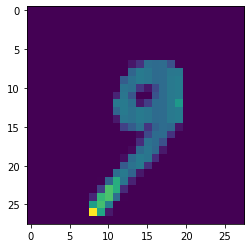

In [75]:
###Check if the prediction is true, it ends up being true.
plt.imshow(x_test[1000])

In [78]:
import cv2

In [93]:
zero = cv2.imread('zero.png')

TypeError: Image data of dtype object cannot be converted to float

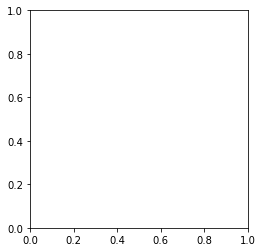

In [95]:
plt.imshow(zero)